In [207]:
!pip install xlrd
!pip install squarify


In [208]:
print("1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria")
import pandas as pd
import pymongo
import pandas as pd
import matplotlib.pyplot as plt #pyplot è un metodo che utilizza un linguaggi simili agli altri
import numpy as np
import squarify  # pip install squarify (algorithm for treemap)
df_tipi_bici = pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 1 )
df_marche = pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 0 )
df_prodotti = pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 2 )
df_quantita= pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 3 )
df_contatti= pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 4 )
df_ordini_quantita=pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 5 )
df_ordini= pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 6 )
df_personale= pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 7 )
df_negozi= pd.read_excel( "https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true" , sheet_name= 8)
df_catalogo = pd.merge(df_prodotti, df_tipi_bici, how="left", on=["category_id"])
df_catalogo = pd.merge(df_catalogo, df_marche, how="left", on=["brand_id"])
df_catalogo =pd.merge(df_catalogo, df_quantita, how="left", on=["product_id"])
df_catalogo[["product_name","brand_name","category_name"]]

1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria


,product_name,brand_name,category_name
0,Trek 820 - 2016,Trek,Mountain Bikes
1,Trek 820 - 2016,Trek,Mountain Bikes
2,Trek 820 - 2016,Trek,Mountain Bikes
3,Ritchey Timberwolf Frameset - 2016,Ritchey,Mountain Bikes
4,Ritchey Timberwolf Frameset - 2016,Ritchey,Mountain Bikes
...,...,...,...
942,Trek Checkpoint ALR 5 - 2019,Trek,Road Bikes
943,Trek Checkpoint ALR 5 Women's - 2019,Trek,Road Bikes
944,Trek Checkpoint SL 5 Women's - 2019,Trek,Road Bikes
945,Trek Checkpoint SL 6 - 2019,Trek,Road Bikes


In [209]:
df_catalogo

,product_id,product_name,brand_id,category_id,model_year,list_price,category_name,brand_name,store_id,quantity
0,1,Trek 820 - 2016,9,6,2016,379.99,Mountain Bikes,Trek,1.0,27.0
1,1,Trek 820 - 2016,9,6,2016,379.99,Mountain Bikes,Trek,2.0,14.0
2,1,Trek 820 - 2016,9,6,2016,379.99,Mountain Bikes,Trek,3.0,14.0
3,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99,Mountain Bikes,Ritchey,1.0,5.0
4,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99,Mountain Bikes,Ritchey,2.0,16.0
...,...,...,...,...,...,...,...,...,...,...
942,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99,Road Bikes,Trek,NaN,NaN
943,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99,Road Bikes,Trek,NaN,NaN
944,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99,Road Bikes,Trek,NaN,NaN
945,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99,Road Bikes,Trek,NaN,NaN


In [210]:
print("2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.")
df_quantita_catalogo=pd.merge(df_catalogo, df_quantita, how="left", on=["product_id"])
df_grafico_1=df_quantita_catalogo[["category_name","quantity_x"]]
df_grafico_1

2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.


,category_name,quantity_x
0,Mountain Bikes,27.0
1,Mountain Bikes,27.0
2,Mountain Bikes,27.0
3,Mountain Bikes,14.0
4,Mountain Bikes,14.0
...,...,...
2820,Road Bikes,NaN
2821,Road Bikes,NaN
2822,Road Bikes,NaN
2823,Road Bikes,NaN


In [211]:
print("3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti")
df_prodotto_x_marca=df_quantita_catalogo.groupby("brand_name").count().reset_index()
df_prodotto_x_marca[["brand_name","quantity_x"]]

3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti


,brand_name,quantity_x
0,Electra,1044
1,Haro,90
2,Heller,27
3,Pure Cycles,27
4,Ritchey,9
5,Strider,27
6,Sun Bicycles,207
7,Surly,225
8,Trek,1161


In [212]:
print("4. i nomi dei prodotti della marca Trek")
print("i nomi dei prodotti della marca Trek sono:")
df_catalogo[df_catalogo["brand_name"]=="Trek"][["product_name"]]

4. i nomi dei prodotti della marca Trek
i nomi dei prodotti della marca Trek sono:


,product_name
0,Trek 820 - 2016
1,Trek 820 - 2016
2,Trek 820 - 2016
9,Trek Fuel EX 8 29 - 2016
10,Trek Fuel EX 8 29 - 2016
...,...
942,Trek Checkpoint ALR 5 - 2019
943,Trek Checkpoint ALR 5 Women's - 2019
944,Trek Checkpoint SL 5 Women's - 2019
945,Trek Checkpoint SL 6 - 2019


In [213]:
print("5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome")
df_catalogo[df_catalogo["category_name"].str.contains("Bikes")][["product_name"]]

5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome


,product_name
0,Trek 820 - 2016
1,Trek 820 - 2016
2,Trek 820 - 2016
3,Ritchey Timberwolf Frameset - 2016
4,Ritchey Timberwolf Frameset - 2016
...,...
942,Trek Checkpoint ALR 5 - 2019
943,Trek Checkpoint ALR 5 Women's - 2019
944,Trek Checkpoint SL 5 Women's - 2019
945,Trek Checkpoint SL 6 - 2019


In [214]:
print("6. la categoria che ha il prodotto che costa di più")
x=df_catalogo["list_price"].max()
df_catalogo[df_catalogo["list_price"]==x][["category_name"]]

6. la categoria che ha il prodotto che costa di più


,category_name
462,Road Bikes
463,Road Bikes
464,Road Bikes


In [215]:
print("7. i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti")
df_prodotto_x_marca[df_prodotto_x_marca["quantity_x"]>=100][["brand_name"]]

7. i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti


,brand_name
0,Electra
6,Sun Bicycles
7,Surly
8,Trek


In [216]:
print("8. la marca del prodotto 'Electra Townie Original 21D - 2016'")
df_catalogo[df_catalogo["product_name"]=="Electra Townie Original 21D - 2016"]["brand_name"]

8. la marca del prodotto 'Electra Townie Original 21D - 2016'


33    Electra
34    Electra
35    Electra
69    Electra
70    Electra
71    Electra
Name: brand_name, dtype: object

In [217]:
print("9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti")
df_date= df_ordini
df_date["anno"] = pd.DatetimeIndex(df_date['order_date']).year
df_date=df_date.groupby("anno").count().reset_index()[["anno","order_id"]]
df_date

9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti


,anno,order_id
0,2016,635
1,2017,688
2,2018,292


Visualizzare i grafici più adatti per le richieste 2, 3, 7 e 9
grafico a barre verticali per l'esercizio 2:  il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.


<BarContainer object of 2825 artists>

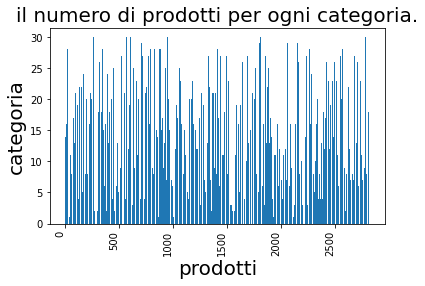

In [218]:
print("Visualizzare i grafici più adatti per le richieste 2, 3, 7 e 9")
print("grafico a barre verticali per l'esercizio 2:  il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.")
x = list(df_grafico_1.index)
y = list(df_grafico_1["quantity_x"])
fig,ax=plt.subplots()
ax.set_title("il numero di prodotti per ogni categoria.", fontsize=20)
ax.set_xlabel("prodotti", fontsize=20)
ax.set_ylabel("categoria", fontsize=20)
fig.autofmt_xdate(rotation=90)
ax.bar(x,y)

grafico a barre verticali per l'esercizio 3: il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti.


<BarContainer object of 9 artists>

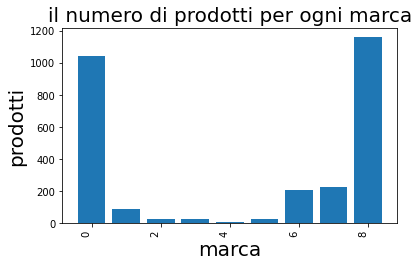

In [219]:
print("grafico a barre verticali per l'esercizio 3: il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti.")
df_grafico_2= df_prodotto_x_marca[["brand_name","quantity_x"]]
df_grafico_2
x = list(df_grafico_2.index)
y = list(df_grafico_2["quantity_x"])
fig,ax=plt.subplots()
ax.set_title("il numero di prodotti per ogni marca", fontsize=20)
ax.set_xlabel("marca", fontsize=20)
ax.set_ylabel("prodotti", fontsize=20)
fig.autofmt_xdate(rotation=90)
ax.bar(x,y)

grafico a torta per l'esercizio 7: i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti.


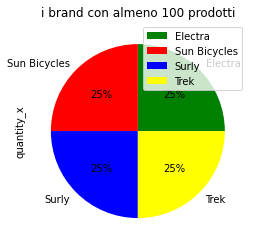

In [220]:
print("grafico a torta per l'esercizio 7: i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti.")
df_grafico_3=df_prodotto_x_marca[df_prodotto_x_marca["quantity_x"]>=100]
torta=df_grafico_3.groupby(['brand_name']).count().plot(kind='pie', y='quantity_x', autopct='%1.0f%%',colors = ['green', 'red', 'blue',"yellow"],title='i brand con almeno 100 prodotti')

grafico a torta per l'esercizio 9: il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti


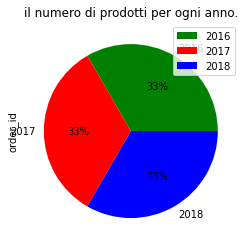

In [221]:
print("grafico a torta per l'esercizio 9: il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti")
torta2=df_date.groupby(['anno']).count().plot(kind='pie', y='order_id', autopct='%1.0f%%',colors = ['green', 'red', 'blue',],title='il numero di prodotti per ogni anno.')
torta2